#SIMULANDO A DISTRIBUIÇÃO WEIBULL

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import weibull_min
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

## Criando amostra

---



In [ ]:
# Parâmetros
scale_parameter = 10  #escala
shape_parameter = 2   #forma

In [ ]:
# Número de amostras e geração de dados
num_samples = 1000
wind_speed_data = weibull_min.rvs(shape_parameter, scale=scale_parameter, size=num_samples)

(array([0.0248859 , 0.04579006, 0.05474898, 0.07565313, 0.06868508,
        0.07764401, 0.09058467, 0.08560749, 0.08660293, 0.07067595,
        0.05873072, 0.04579006, 0.05275811, 0.03683113, 0.03484026,
        0.0248859 , 0.01791785, 0.01592698, 0.00796349, 0.00995436,
        0.00298631, 0.        , 0.00398174, 0.        , 0.        ,
        0.00099544, 0.        , 0.        , 0.        , 0.00099544]),
 array([ 0.39006813,  1.39465307,  2.39923802,  3.40382297,  4.40840791,
         5.41299286,  6.41757781,  7.42216276,  8.4267477 ,  9.43133265,
        10.4359176 , 11.44050255, 12.44508749, 13.44967244, 14.45425739,
        15.45884233, 16.46342728, 17.46801223, 18.47259718, 19.47718212,
        20.48176707, 21.48635202, 22.49093697, 23.49552191, 24.50010686,
        25.50469181, 26.50927675, 27.5138617 , 28.51844665, 29.5230316 ,
        30.52761654]),
 <BarContainer object of 30 artists>)

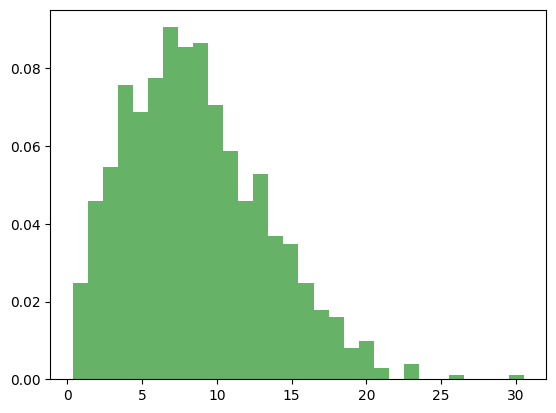

In [ ]:
#dados gerados
plt.hist(wind_speed_data, bins=30, density=True, alpha=0.6, color='g')

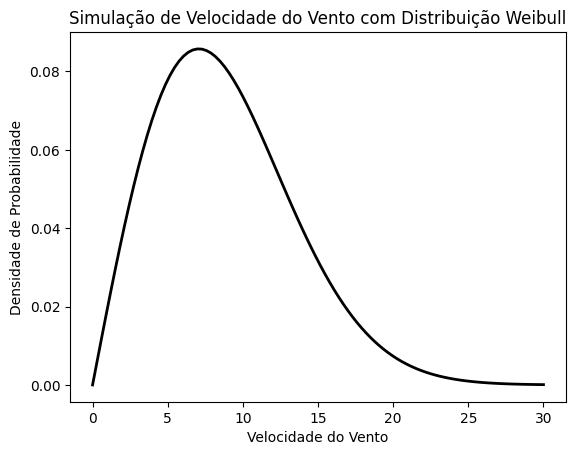

In [ ]:
#densidade de probabilidade (PDF)
x = np.linspace(0, 30, 100)
pdf = weibull_min.pdf(x, shape_parameter, scale=scale_parameter)
plt.plot(x, pdf, 'k-', linewidth=2)

plt.title('Simulação de Velocidade do Vento com Distribuição Weibull')
plt.xlabel('Velocidade do Vento')
plt.ylabel('Densidade de Probabilidade')
plt.show()


#EXPLORANDO DADOS REAIS

---



In [ ]:
df = pd.read_csv('climaSalvador.csv', sep = ';')

In [ ]:
df.head(5)

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,01/01/2022,0.0,1.006.533.333,218.625,30.4,26.445.833,24.2,76.166.667,64,8.7,1.145.833
1,02/01/2022,0.0,10.071.875,21.675,30.8,26.729.167,23.5,74.333.333,60,5.2,1.004.167
2,03/01/2022,0.0,1007.2,21.258.333,30.9,26.708.333,24.0,72.666.667,56,6.8,10.125
3,04/01/2022,0.0,1006.1,21.733.333,28.9,250.625,23.1,82,69,5.6,.85
4,05/01/2022,8.8,10.055.375,21.970.833,31.2,26.7,22.9,76.041.667,58,8.3,1.179.167


VARIÁVEIS PRESENTE NA BASE

---



In [ ]:
list(df)

['Data Medicao',
 'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)',
 'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)',
 'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)',
 'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)',
 'TEMPERATURA MEDIA, DIARIA (AUT)(°C)',
 'TEMPERATURA MINIMA, DIARIA (AUT)(°C)',
 'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)',
 'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)',
 'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)',
 'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)']

VALORES NULOS POR VARIÁVEL

---



In [ ]:
df.isnull().sum()

Data Medicao                                              0
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                      0
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                0
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)    0
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                      0
TEMPERATURA MEDIA, DIARIA (AUT)(°C)                       0
TEMPERATURA MINIMA, DIARIA (AUT)(°C)                      0
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)             0
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)            0
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                    0
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                 0
dtype: int64

TIPO DE DADOS

---



In [ ]:
df.dtypes

Data Medicao                                               object
PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                      float64
PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)                 object
TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)     object
TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                      float64
TEMPERATURA MEDIA, DIARIA (AUT)(°C)                        object
TEMPERATURA MINIMA, DIARIA (AUT)(°C)                      float64
UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)              object
UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)              int64
VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)                    float64
VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)                  object
dtype: object

### PLOTANDO A VARIÁVEL 'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)´

---



In [ ]:
velocidade_vento = df['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)'].dropna().values #DROPANDO VALORES AUSENTES CASO HOUVER

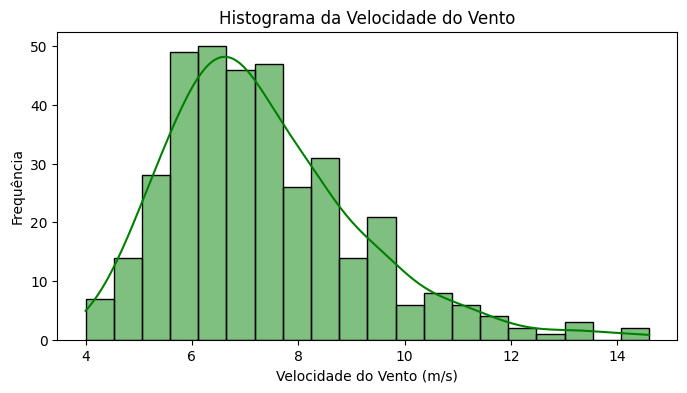

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(velocidade_vento, bins=20, kde=True, color='green')
plt.title('Histograma da Velocidade do Vento')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Frequência')
plt.show()

### SUMÁRIO DE ESTATÍSTICAS DESCRITIVAS

---



In [ ]:
summary_stats = df['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)'].quantile([0.25, 0.75])#CONSULTANDO OS QUARTIS

In [ ]:
#verificando valores extremos através do IQR
valores_extremos = df[(df['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)'] > summary_stats.loc[0.75] + 1.5 * (summary_stats.loc[0.75] - summary_stats.loc[0.25]))
                    | (df['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)'] < summary_stats.loc[0.25] - 1.5 * (summary_stats.loc[0.75] - summary_stats.loc[0.25]))]

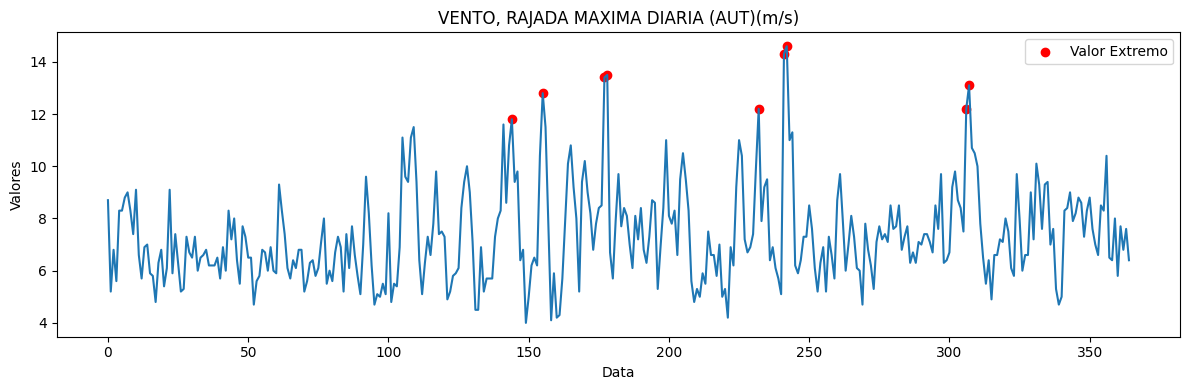

In [ ]:
plt.figure(figsize=(12, 4))

plt.plot(df.index, df['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)'])
plt.scatter(valores_extremos.index, valores_extremos['VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)'], color='red', label='Valor Extremo')
plt.title('VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.tight_layout()

plt.show()

### Ajustando a distribuição Weibull aos dados de vento

---



In [ ]:
def ajuste_weibull(parametros, dados):
    shape, scale = parametros
    return -np.sum(np.log(weibull_min.pdf(dados, shape, scale=scale)))

In [ ]:
parametros_iniciais = [2, 10]

In [ ]:
# Ajuste  modelo aos dados  usando minimize
resultado_ajuste = minimize(ajuste_weibull, parametros_iniciais, args=(velocidade_vento,))
shape_otimo, scale_otimo = resultado_ajuste.x

In [ ]:
dados_sinteticos = weibull_min.rvs(shape_otimo, scale=scale_otimo, size=len(velocidade_vento))

In [ ]:
#erro  entre dados reais e sintéticos
mse = mean_squared_error(velocidade_vento, dados_sinteticos)
mse

7.171711000861486

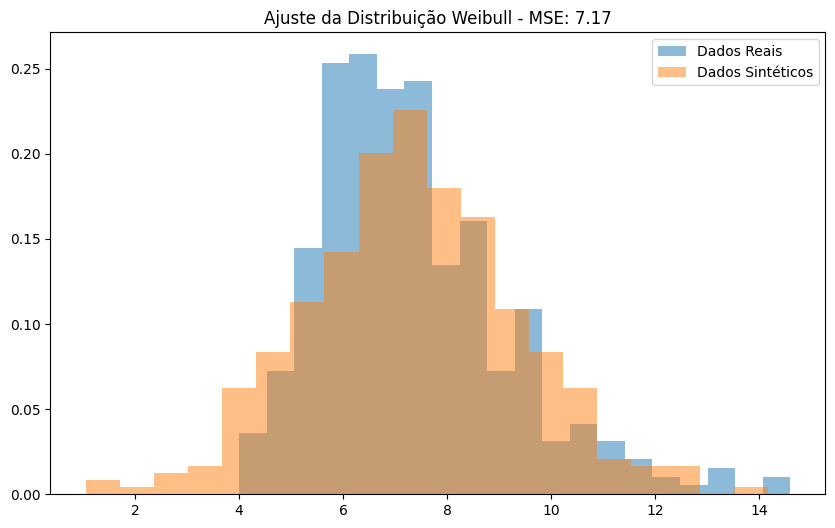

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(velocidade_vento, bins=20, alpha=0.5, label='Dados Reais', density=True)
plt.hist(dados_sinteticos, bins=20, alpha=0.5, label='Dados Sintéticos', density=True)
plt.title(f'Ajuste da Distribuição Weibull - MSE: {mse:.2f}')
plt.legend()
plt.show()
